# X90 Optimiser

This notebook is purely for the purpose of optimising the X90 pulse for a given transmon

optimal args for when λ is optimised for fidelity:
{'A': 15.236956382469863, 'τ': 0.24, 'λ': 2.3095911839100376, 'α': -199, 'ω01': 3981, 'φ': 0}

optimal args for when λ is optimised for leakage: $\lambda\approx30$ but then the final state is lost.

In [1]:
# imports
import numpy as np
from qutip import basis
from transmon_code.transmon import *
from transmon_code.optimise_X90 import *
from transmon_code.simulate import *

In [5]:
# define the transmon

tr = Transmon(n_levels=8, initial_state=0, Ω=2*np.pi*3981, α=2*np.pi*-199)

# for a pulse of length 0.024
tr.X90_args = {'A': 1.02431707152378, 'τ': 0.024, 'λ': -1.4702485711260789, 'α': tr.α, 'ω': tr.Ω, 'final_Z_rot': 0.2555209480765517}


In [6]:
# optimise the pulse

semiranges = {"A":0.05, "λ":0.05}

for i in range(3):
    tr.X90_args = create_X90_pulse(tr, tr.X90_args, semiranges, plot=True, rand_init=True, N=40)

Optimising A
1 2 

KeyboardInterrupt: 

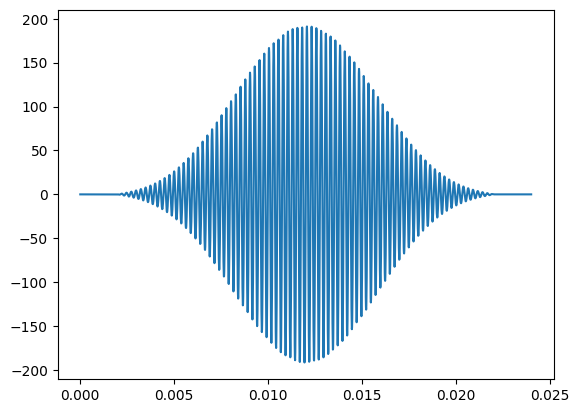

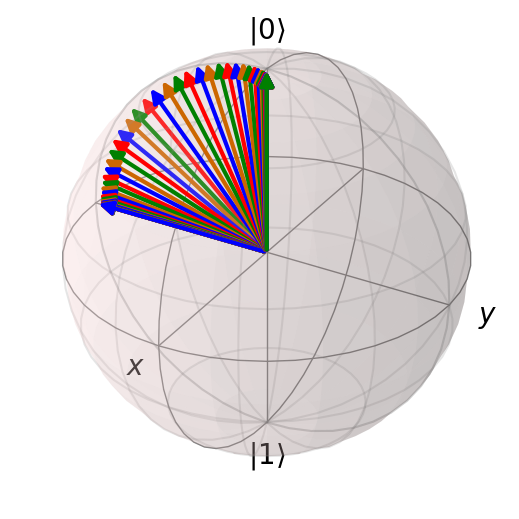

Fidelity (f):                0.9991584241687265
Measured error (1-f):        0.0008415758312735333

Leakage error:               0.0008415745258863688
Theoretical coherence error: 0.0
Error accounted for:         0.0008415745258863688

Error unaccounted for:       1.305387164465474e-09


In [4]:
# check result
# %matplotlib qt

# test from 0 to - (minus)
targ = (basis(tr.n_levels, 0)-1j*basis(tr.n_levels, 1)).unit()

res, f = simulate(tr, tr.X90_args, target=targ, noise=False, plot=True)

break_down_errors(tr, tr.X90_args, res[-1], f)